In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.graphics.mosaicplot import mosaic

plt.rcParams['axes.unicode_minus'] = False

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams["font.family"]

['NanumGothic']

In [0]:
data = pd.read_csv('_data.csv')

In [0]:
data.head()

,Unnamed: 0,열차번호,역,출도착구분,급행여부,지연여부,요일1,환승가능,시간,승차,하차,5번째전역_지연여부,역정체여부,역_시간_실지연가중치
0,0,0,6,0,0,0,1,1,16,1122.0,170.0,0,0,12
1,1,0,7,1,0,0,1,0,16,152.0,43.0,0,0,40
2,2,0,3,1,0,0,1,0,16,711.0,198.0,0,0,1
3,3,0,62,1,0,0,1,0,16,470.0,91.0,0,0,0
4,4,0,65,1,0,0,1,0,16,212.0,58.0,0,0,1


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 808279 entries, 0 to 808278
Data columns (total 14 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   808279 non-null  int64  
 1   열차번호         808279 non-null  int64  
 2   역            808279 non-null  int64  
 3   출도착구분        808279 non-null  int64  
 4   급행여부         808279 non-null  int64  
 5   지연여부         808279 non-null  int64  
 6   요일1          808279 non-null  int64  
 7   환승가능         808279 non-null  int64  
 8   시간           808279 non-null  int64  
 9   승차           808279 non-null  float64
 10  하차           808279 non-null  float64
 11  5번째전역_지연여부   808279 non-null  int64  
 12  역정체여부        808279 non-null  int64  
 13  역_시간_실지연가중치  808279 non-null  int64  
dtypes: float64(2), int64(12)
memory usage: 86.3 MB


In [0]:
data = data.drop(['Unnamed: 0'],axis = 1)

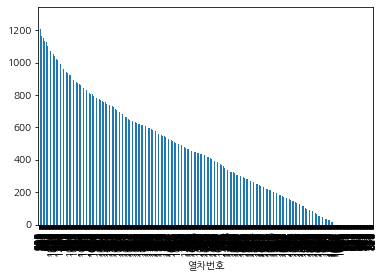

In [0]:
data.groupby('열차번호')['지연여부'].sum().sort_values(ascending = False).plot(kind = 'bar')

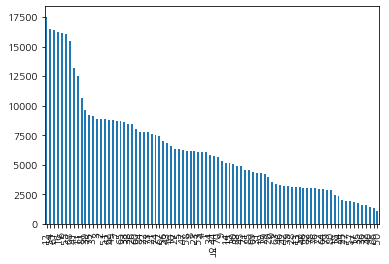

In [0]:
data.groupby('역')['지연여부'].sum().sort_values(ascending = False).plot(kind = 'bar')

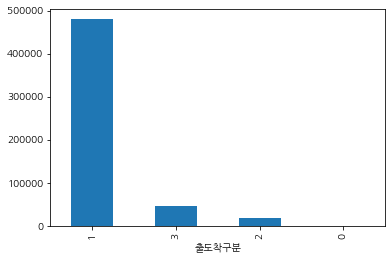

In [0]:
data.groupby('출도착구분')['지연여부'].sum().sort_values(ascending = False).plot(kind = 'bar')

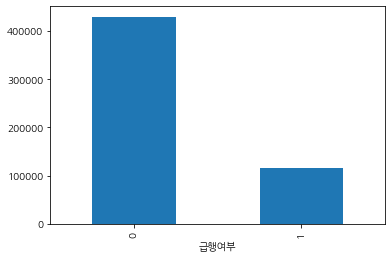

In [0]:
data.groupby('급행여부')['지연여부'].sum().sort_values(ascending = False).plot(kind = 'bar')

### 요일1은 평일과 주말을 1과 0으로 구분

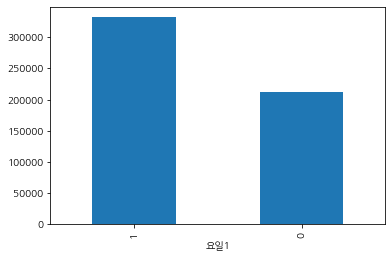

In [0]:
data.groupby('요일1')['지연여부'].sum().sort_values(ascending = False).plot(kind = 'bar')

In [0]:
data.groupby('요일1')['지연여부'].sum()[1]

332589

In [0]:
data[data['요일1']==1]['요일1'].count()

474846

In [0]:
data[data['요일1']==0]['요일1'].count()

333433

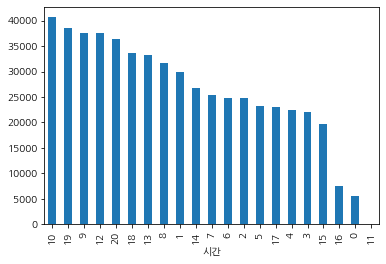

In [0]:
data.groupby('시간')['지연여부'].sum().sort_values(ascending = False).plot(kind = 'bar')

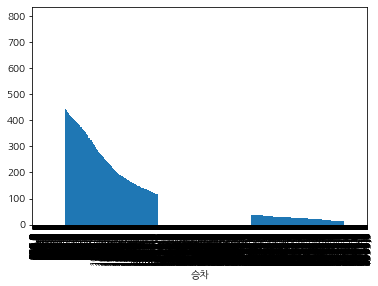

In [0]:
data.groupby('승차')['지연여부'].sum().sort_values(ascending = False).plot(kind = 'bar')

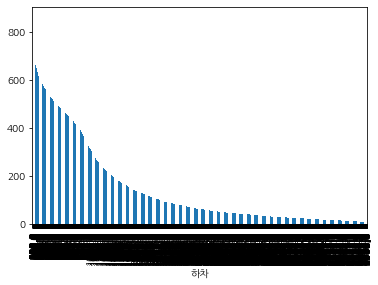

In [0]:
data.groupby('하차')['지연여부'].sum().sort_values(ascending = False).plot(kind = 'bar')

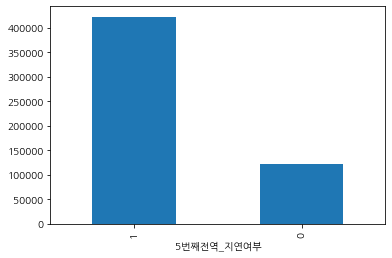

In [0]:
data.groupby('5번째전역_지연여부')['지연여부'].sum().sort_values(ascending = False).plot(kind = 'bar')

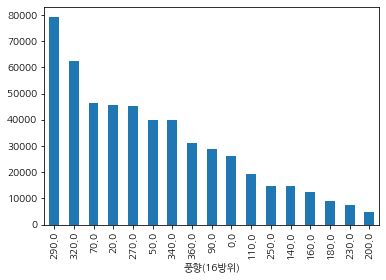

In [0]:
data.groupby('역정체여부')['지연여부'].sum().sort_values(ascending = False).plot(kind = 'bar')

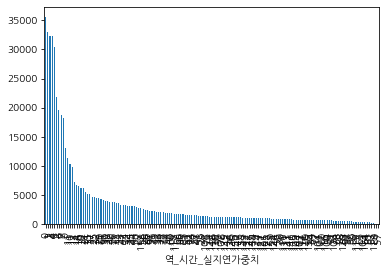

In [0]:
data.groupby('역_시간_실지연가중치')['지연여부'].sum().sort_values(ascending = False).plot(kind = 'bar')

# 지연여부(종속변수)와의 상관관계도

In [0]:
data.columns.tolist()

['열차번호',
 '역',
 '출도착구분',
 '급행여부',
 '지연여부',
 '요일1',
 '환승가능',
 '시간',
 '승차',
 '하차',
 '5번째전역_지연여부',
 '역정체여부',
 '역_시간_실지연가중치']

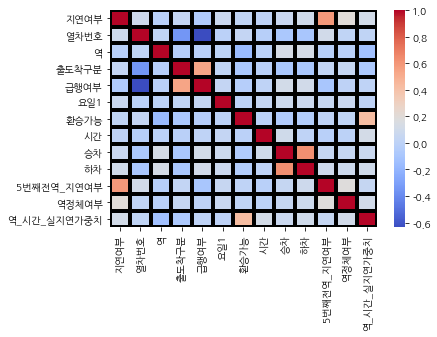

In [0]:
sns.heatmap(data[['지연여부',
 '열차번호',
 '역',
 '출도착구분',
 '급행여부',
 '요일1',
 '환승가능',
 '시간',
 '승차',
 '하차',
 '5번째전역_지연여부',
 '역정체여부',
 '역_시간_실지연가중치']].corr(),
            cmap = "coolwarm",
           linewidth = 3, linecolor = "black")

In [0]:
data.to_csv('data.csv')